In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
ibtr_df = pd.read_csv('/home/ices/work/typhoon_intensity/data/gridsat.path.ibtr.windspeed.csv')

In [3]:
ibtr_df['PATH'] = ibtr_df['PATH'].map(lambda x: x.replace('GridSat_B1_new_npy', 'GridSat_B1_npy'))

In [4]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
impute_img = []
imputed_img = []
for i in range(len(ibtr_df)):
    npy_path = ibtr_df.at[i, "PATH"]
    
    item = np.load(npy_path)
    
    if len(np.where(item[0] < 0)[0])!=0:
        try:
            impute_img.append(np.copy(item[0]))
            item[0] = imputer.fit_transform(np.where(item[0]<0,np.nan,item[0]))
            imputed_img.append(item[0])
        except:
            break

In [5]:
# '/home/ices/work/typhoon_intensity/data/GridSat_B1_npy/2011270N18139/2011270N18139.201109281500.npy',
#  '/home/ices/work/typhoon_intensity/data/GridSat_B1_npy/2011302N13062/2011302N13062.201111020900.npy',
#  '/home/ices/work/typhoon_intensity/data/GridSat_B1_npy/2011323N09264/2011323N09264.201111230000.npy',
#  '/home/ices/work/typhoon_intensity/data/GridSat_B1_npy/2011361S09095/2011361S09095.201201010000.npy',
#  '/home/ices/work/typhoon_intensity/data/GridSat_B1_npy/2012359N08134/2012359N08134.201212250300.npy',
#  '/home/ices/work/typhoon_intensity/data/GridSat_B1_npy/2012359N08134/2012359N08134.201212250600.npy',

In [6]:
len(impute_img)

111

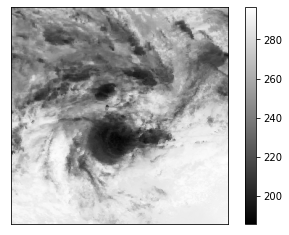

In [24]:
normal_img = np.load(ibtr_df.loc[1, 'PATH'])
plt.imshow(normal_img[0], cmap ='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()

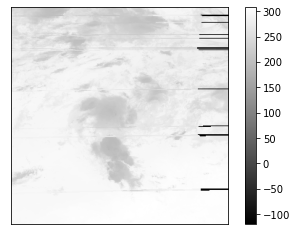

In [18]:
plt.imshow(impute_img[0], cmap ='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()

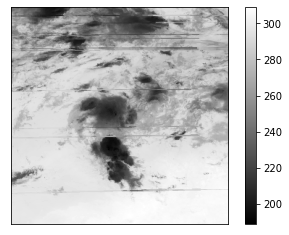

In [17]:
plt.imshow(imputed_img[0], cmap ='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()

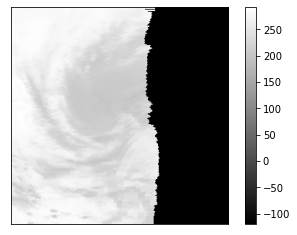

In [21]:
invalid_img = np.load('/home/ices/work/typhoon_intensity/data/GridSat_B1_npy/2012359N08134/2012359N08134.201212250600.npy')
plt.imshow(invalid_img[0], cmap ='gray')
plt.xticks([])
plt.yticks([])
plt.colorbar()